# About Dataset
## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
# importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
original_data = pd.read_csv('creditcard.csv')

 #creating a deep copy so that changes made cannont affect the original dataset
data = original_data.copy(deep= True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print('No. of records in the dataset:', data.shape[0]) # 2,84,807 rows
print("No. of columns in the dataset:", data.shape[1])

No. of records in the dataset: 284807
No. of columns in the dataset: 31


### Understanding the Data

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# check for duplicates
print("Duplicated in the dataset:", data.duplicated().sum())

Duplicated in the dataset: 1081


In [8]:
# Check wheather duplicates or valueable or not before dropping them

data[data.duplicated(keep= False)].shape

(1854, 31)

In [9]:
data[(data.duplicated(keep= False)) & (data['Time'] == 26.0) & (data['Amount'] == 6.14)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0


In [10]:
# drop duplicates - 
data_v1 = data.drop_duplicates(ignore_index=True) #ignore_index resets the index in serialwise.
data_v1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Checking Dataset shape and class distribution

print("Shape:", data_v1.shape)
print('-'*100)
print(data_v1['Class'].value_counts())
print('-'*100)
print(data_v1['Class'].value_counts(normalize= True)*100)

Shape: (283726, 31)
----------------------------------------------------------------------------------------------------
Class
0    283253
1       473
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


**Fraud= 0.168% confirms highly imbalanced dataset**

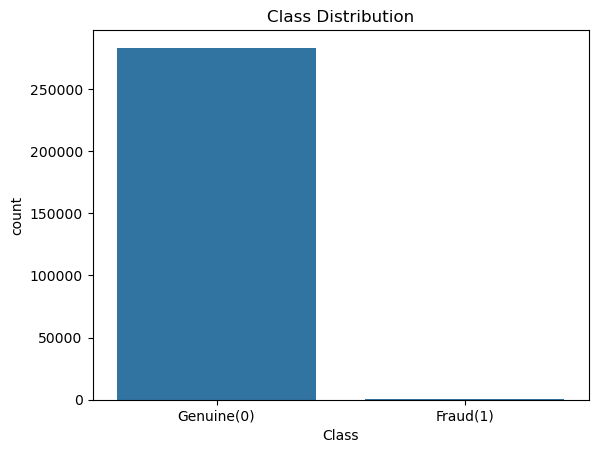

In [12]:
sns.countplot(x= "Class", data= data_v1)
plt.title("Class Distribution")
plt.xticks([0,1], ['Genuine(0)', 'Fraud(1)'])
plt.show()

**Proved imbalance visually also, And that's a lot of imbalance**

In [13]:
# statistical Summary
data_v1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Summary:
* Amount has large range starting from 0 to reaching 25691.16 dollars. Observed having high variance.
* Also the time(in seconds) range startig from 0 to all the way upto 172792. Little confusion on why it has that much values

## Distribution of Amount and Time

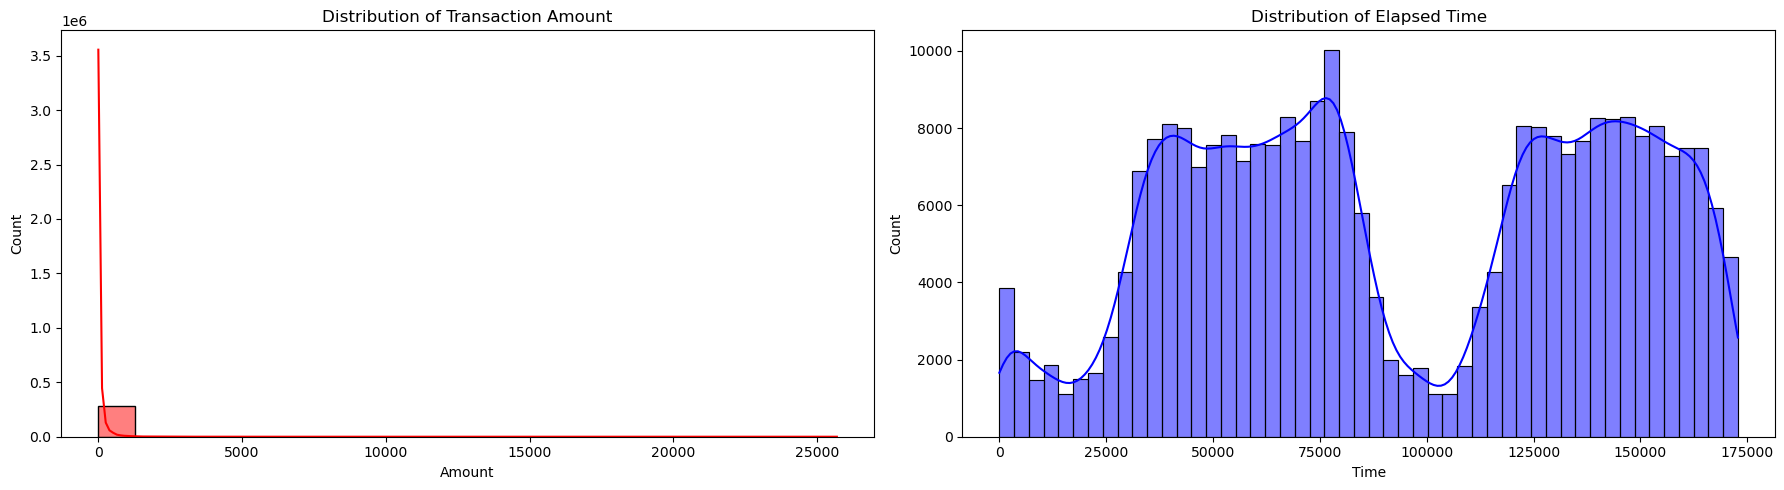

In [14]:
plt.figure(figsize= (18, 5))

plt.subplot(1,2, 1) 
sns.histplot(data= data_v1['Amount'], kde= True, bins = 20, color= 'r' )
plt.title("Distribution of Transaction Amount")


plt.subplot(1, 2, 2)
sns.histplot(data= data_v1['Time'], kde= True, color= 'b', bins= 50)
plt.title("Distribution of Elapsed Time")

plt.tight_layout()
plt.show()


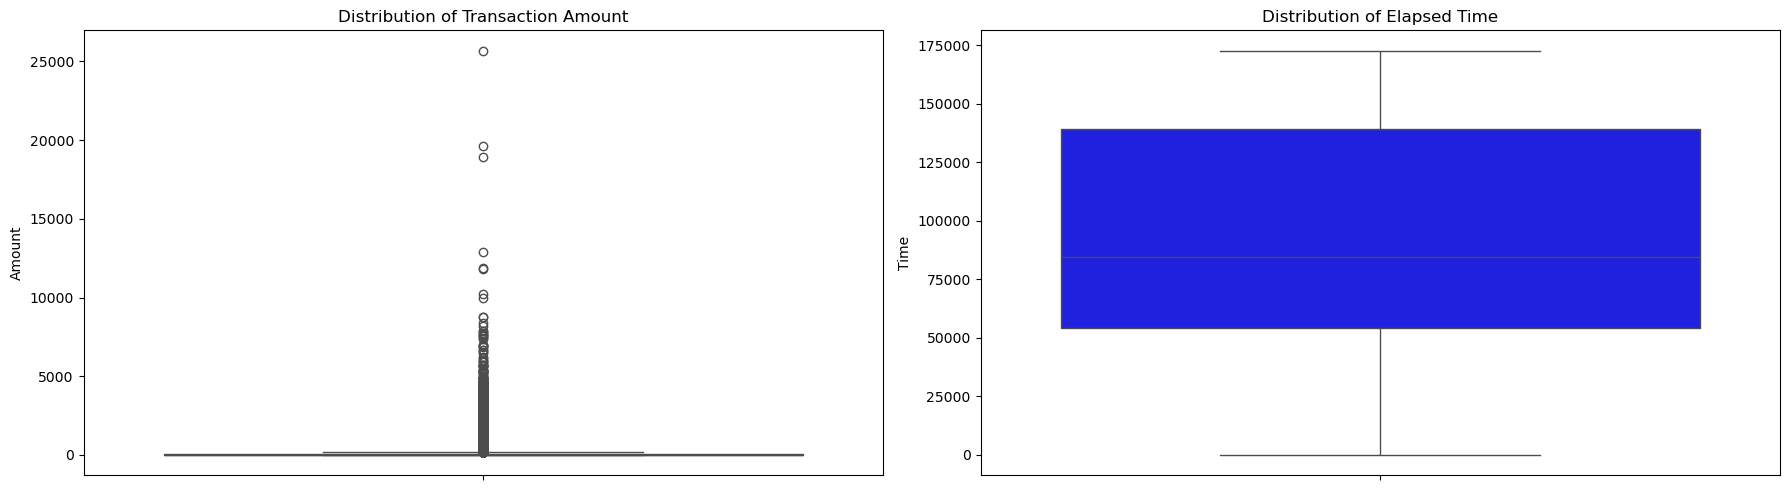

In [15]:
plt.figure(figsize= (18, 5))

plt.subplot(1,2, 1) 
sns.boxplot(data= data_v1['Amount'], color= 'r' )
plt.title("Distribution of Transaction Amount")


plt.subplot(1, 2, 2)
sns.boxplot(data= data_v1['Time'],  color= 'b')
plt.title("Distribution of Elapsed Time")

plt.tight_layout()
plt.show()

### Summary
* The values in Amount feature is heavily right skewed, since the are a lot of outliers going way up.
* Where as the Time data is almost evenly distributed but it is double curved bell, No outlier present in the dataset. As we can see in the boxplot.


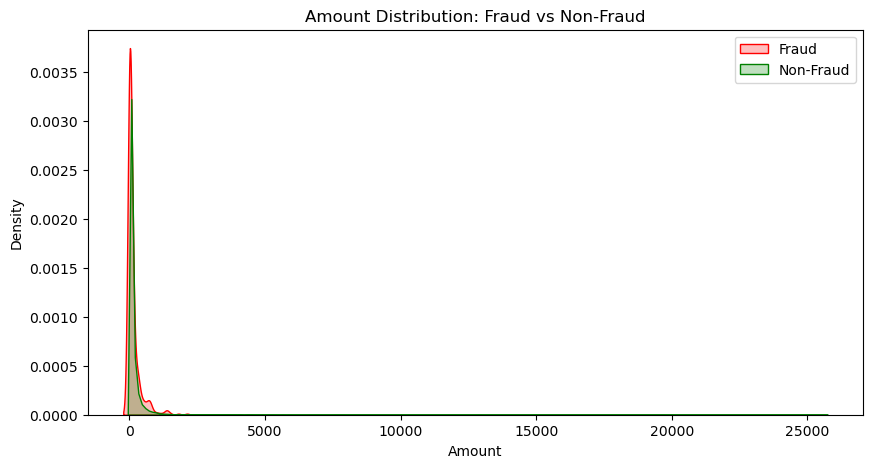

In [16]:
fraud = data_v1[data_v1['Class'] == 1]
nonfraud = data_v1[data_v1['Class'] == 0]

# Amount vs Class
plt.figure(figsize=(10, 5))
sns.kdeplot(fraud['Amount'], label='Fraud', fill=True, color='red')
sns.kdeplot(nonfraud['Amount'], label='Non-Fraud', fill=True, color='green')
plt.title("Amount Distribution: Fraud vs Non-Fraud")
plt.legend()
plt.show()


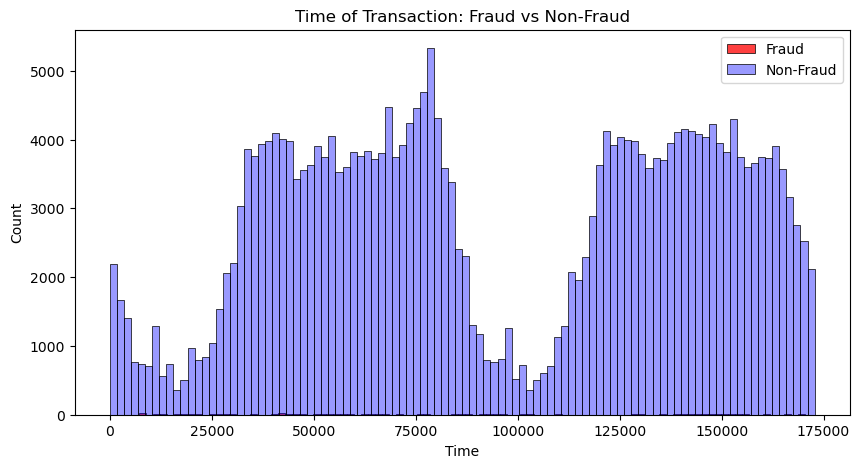

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(fraud['Time'], bins=100, color='red', label='Fraud')
sns.histplot(nonfraud['Time'], bins=100, color='blue', label='Non-Fraud', alpha=0.4)
plt.legend()
plt.title("Time of Transaction: Fraud vs Non-Fraud")
plt.show()


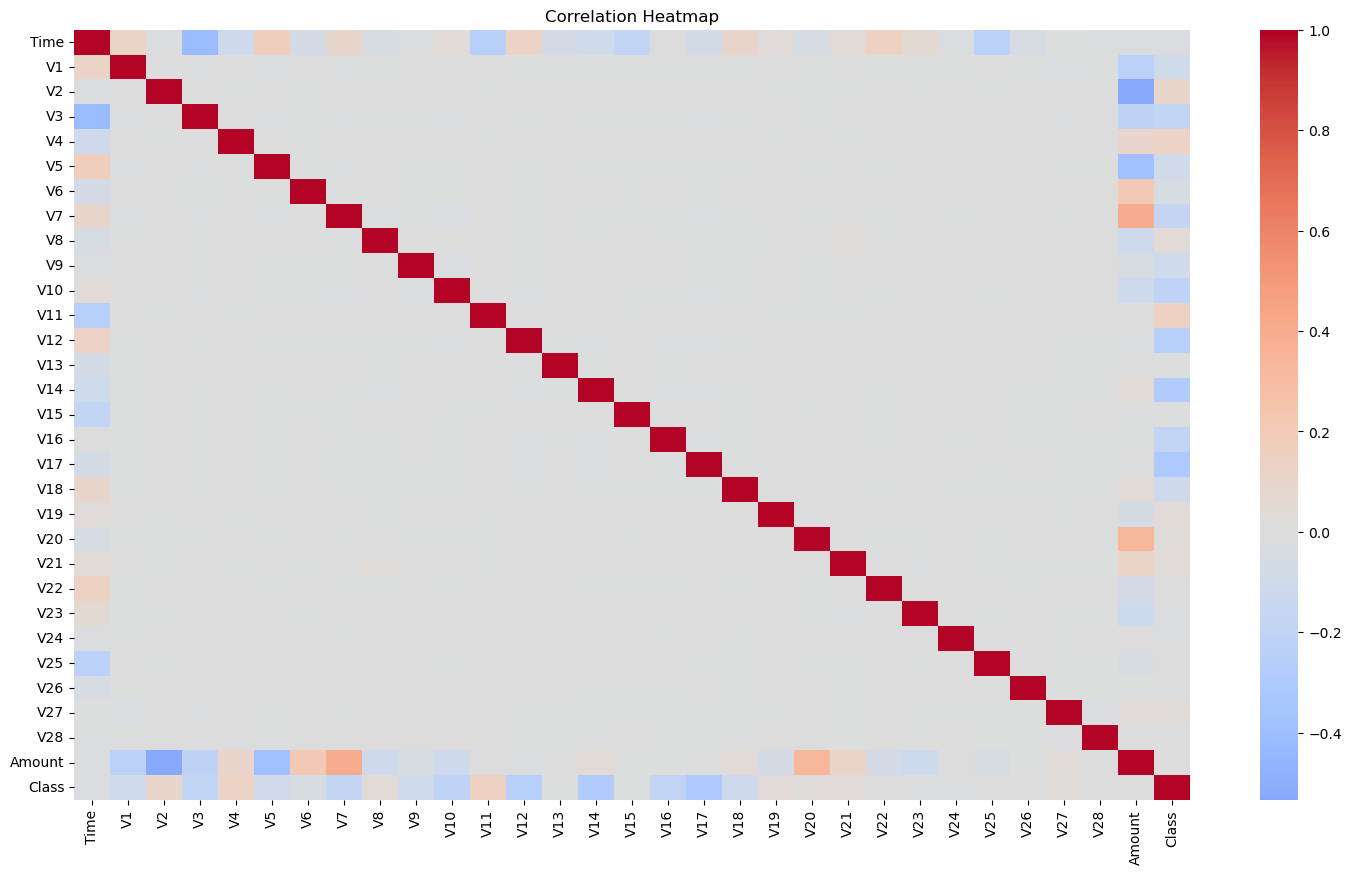

In [18]:
plt.figure(figsize=(18, 10))
corr = data_v1.corr()

sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Summary
* Since the data is heavily imbalance that's why difficult to intrepret the results. But I tried to my best to extract few insights from it.
* Frauds are happened where lease amount is involved. barely anyone have done any fraud with a lot of money. So safe observation but Goal is to elimiate complete frauds.
* Even the Time distribution is also equally distributed but on small scale very hard to see the visualization.
* About the **Heat Map**. Since this is already preprocessed data using PCA and standardized all the features. There is hardly any correlation in dataset. which  is perfect for model building. 

### Handling the outliers in the Amount data

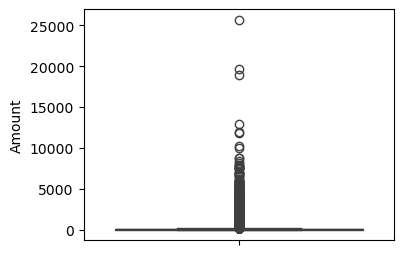

In [19]:
plt.figure(figsize= (4, 3))
sns.boxplot(data= data_v1['Amount'])
plt.show()

In [20]:
# outliers in detailed - Using IQR method

q1 = data_v1['Amount'].quantile(0.25)
q3 = data_v1['Amount'].quantile(0.75)

IQR = q3 - q1

upper_boundary = q3+1.5*IQR
lower_boundary = q1 - 1.5*IQR

print('Upper_Boundary where outliers starts: ', upper_boundary)
print("Total outlier percentage in the data: ",len(data_v1[(data_v1['Amount'] > upper_boundary)])*100/len(data_v1))
print("Total outlier percentage that are fraud cases: ", len(data_v1[(data_v1['Amount'] > upper_boundary) & (data_v1['Class'] == 1)])*100/len(data_v1))

Upper_Boundary where outliers starts:  185.375
Total outlier percentage in the data:  11.1674643846528
Total outlier percentage that are fraud cases:  0.030663386506700127


**Since, There are many outliers including fraud cases we cannot exclude them or clip them because we might miss out something**

* Instead we can use other technique such as Robust Scaler. It should be done after the train test split to avoid data leakage

## Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split

X = data_v1.iloc[:, : -1]
Y = data_v1.iloc[:, -1]

x_data, x_test, y_data, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size= 0.25, random_state = 42)

print(
    {
        "X_train shape:": x_train.shape,
        "x_val shape": x_val.shape,
        "x_test shape": x_test.shape,
        "y_train": y_train.shape,
        "y_val shape": y_val.shape,
        "y_test shape": y_test.shape
    }
)

{'X_train shape:': (170235, 30), 'x_val shape': (56745, 30), 'x_test shape': (56746, 30), 'y_train': (170235,), 'y_val shape': (56745,), 'y_test shape': (56746,)}


### Handling Outliers and as well as standardizing the Values - I want it only for Time and Amount, but let's see

In [23]:
from sklearn.preprocessing import RobustScaler

scaler= RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

### Handling imbalance
**Well, There are various methods to handle imbalance like undersampling, oversampling, using SMOTE, Class weights etc**

### SMOTE
* We can oversample the data using SMOTE technique, matching the shape of data(fraud class) with the shape of genuine class
* It's also called as **Synthetic Minority Oversampling Technique**
* It's work well when used with Supervised algorithms,  Shallow networks. but let's try it out.
  

#### Class_weight
* In classification tasks, Class weights are used to give more importance to least number of class(underrepresented classes like fraud) during model trainging.
* It's all works in loss function internally.
* Basically, The Class_weight method assigns higher weights to minority classes so in the loss function, erros on the minority class are penalised more heavily than those on the majority class.

In [29]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weight= compute_class_weight(class_weight="balanced", classes=classes, y=y_train)

# Convert to dictionary
class_weight_dict = dict(zip(classes, class_weight))
print(class_weight_dict)

{0: 0.5008561643835616, 1: 292.5}


**Above are the weights for different classes that are used in loss function.**
>|| For class 0(Genuine): weight(w0) = 0.5 || For class 1(Fraud): weight(w1) = 293.82 ||

## Here's come the Exciting part - Building a Neural Network model.

In [ ]:
# !pip install tensorflow

In [30]:
# import the necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Build the Model structure

In [61]:
model = Sequential([
    Dense(128, activation= 'relu', input_shape= (x_train.shape[1],)),
    Dense(64, activation= 'relu'),# no need to mention the previous layer as it takes automatically unlikely function model
    Dense(1, activation='sigmoid') # Binary classification
])

model.compile(optimizer= Adam(learning_rate= 0.001), # Tried 0.1,0.01 the values are pretty bad
             loss= 'binary_crossentropy',
             metrics= ['Precision', 'Recall', 'AUC'])

### Train the model

In [62]:
call_back= EarlyStopping(monitor= 'val_loss', patience= 5, restore_best_weights= True) # patience = 3, 10, 5

training_model_1  = model.fit(x_train_scaled, y_train,
                     epochs= 50,
                     batch_size= 500, # Tried 2048, 1024, then 500 - The loss decreased as the batchsize decreased
                     validation_split= 0.2,
                     class_weight= class_weight_dict,
                     callbacks= [call_back])


Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9050 - Precision: 0.0385 - Recall: 0.8148 - loss: 0.3483 - val_AUC: 0.9817 - val_Precision: 0.0293 - val_Recall: 0.9412 - val_loss: 0.2027
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9773 - Precision: 0.0481 - Recall: 0.9100 - loss: 0.1474 - val_AUC: 0.9881 - val_Precision: 0.0509 - val_Recall: 0.9020 - val_loss: 0.1127
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9908 - Precision: 0.0697 - Recall: 0.9197 - loss: 0.1151 - val_AUC: 0.9665 - val_Precision: 0.0846 - val_Recall: 0.8627 - val_loss: 0.0699
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9938 - Precision: 0.0571 - Recall: 0.9389 - loss: 0.1142 - val_AUC: 0.9566 - val_Precision: 0.1106 - val_Recall: 0.8824 - val_loss: 0.0601
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9967 - Precision: 0.0730 - Recall: 0.9699 - loss: 0.0776 - val_AUC: 0.9688 - val_Precision: 0.0662 - val_Recall: 0.8824 - val_loss: 0.0746


### Evaluating the Model

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.24      0.83      0.37        90

    accuracy                           1.00     56746
   macro avg       0.62      0.91      0.68     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9307008770278327


In [66]:
y_pred_prob = model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56653
           1       0.25      0.89      0.39        92

    accuracy                           1.00     56745
   macro avg       0.62      0.94      0.69     56745
weighted avg       1.00      1.00      1.00     56745

ROC-AUC: 0.9640360194287267


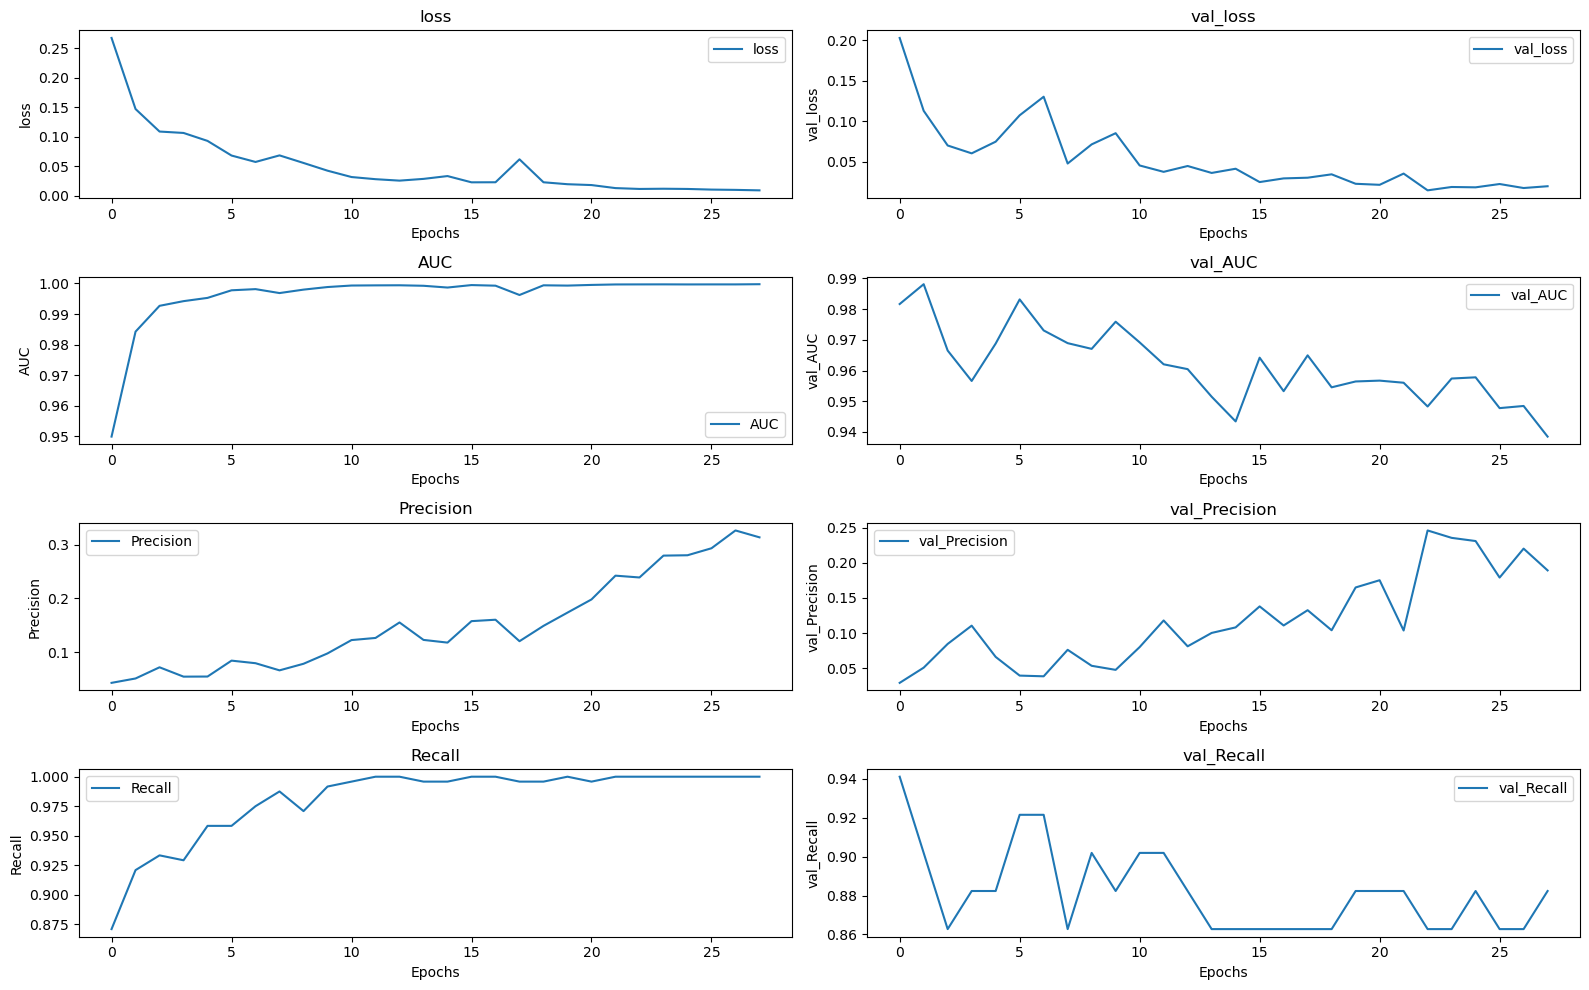

In [63]:
history_dict = training_model_1.history

# Plot metrics
plt.figure(figsize=(16, 10))

# Subplot for each metric
metrics = ['loss', 'val_loss', 'AUC', 'val_AUC', 'Precision', 'val_Precision', 'Recall', 'val_Recall']
for i, metric in enumerate(metrics):
    plt.subplot(4, 2, i+1)
    plt.plot(history_dict[metric], label=metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title(metric)
    plt.legend()

plt.tight_layout()
plt.show()

## Observation
* **I have built a model with recall(0.88) with minloss of 0.02. It's not a strong model but predicts most of the fraud cases correctly(88%) But at a cost of genuine customers predicting as fraud, this is because of Heavy imbalance in dataset.**
* **let's achieve a greater model with high precision and high recall, mostly focused on recall by using other optimization techniques**

## Observation
* **I have built a strong model with recall 1(detects all fraud cases) with minloss of 0.016. But Upon websurfing weather I should Trust my metric or not i got to know that you cannont rerun the same model just by changing parameters, The results can mislead you.**
* Epoch 41/50
  
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9986 - Precision: 0.1213 - Recall: 0.9928 - loss: 0.0328 - val_AUC: 0.9376 - val_Precision: 0.1174 - val_Recall: 0.8814 - val_loss: 0.0343
* Epoch 42/50
  
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9957 - Precision: 0.1407 - Recall: 0.9941 - loss: 0.0229 - val_AUC: 0.9376 - val_Precision: 0.1174 - val_Recall: 0.8814 - val_loss: 0.0382
* Epoch 43/50
  
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9994 - Precision: 0.1768 - Recall: 1.0000 - loss: 0.0168 - val_AUC: 0.9386 - val_Precision: 0.3091 - val_Recall: 0.8644 - val_loss: 0.0156

In [49]:
# let's Save the model first
# model.save("fraud_model_saved.keras") 

## Re-Building the model from scratch again.

In [86]:
def model_structure():
    model = Sequential([
        Dense(128, activation= 'relu', input_shape= (x_train.shape[1],)), # 128, #40
        Dense(64, activation= 'relu'),# 64, 100, 50
        Dense(1, activation='sigmoid') # Binary classification
    ])
    
    model.compile(optimizer= Adam(learning_rate= 0.001),
                 loss= 'binary_crossentropy',
                 metrics= ['Precision', 'Recall', 'AUC'])
    return model

### Model 2

In [90]:
call_back= EarlyStopping(monitor= 'val_loss', patience= 5, restore_best_weights= True) # patience = 3, 10, 5

model_2 = model_structure()

training_2  = model_2.fit(x_train_scaled, y_train,
                     epochs= 50,
                     batch_size= 500, # Tried 2048, 1024, then 500 - The loss decreased as the batchsize decreased
                     validation_split= 0.25,
                     class_weight= class_weight_dict,
                     callbacks= [call_back])

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8383 - Precision: 0.0229 - Recall: 0.7290 - loss: 0.4549 - val_AUC: 0.9753 - val_Precision: 0.0184 - val_Recall: 0.9583 - val_loss: 0.2893
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9838 - Precision: 0.0359 - Recall: 0.9090 - loss: 0.1582 - val_AUC: 0.9745 - val_Precision: 0.0531 - val_Recall: 0.9306 - val_loss: 0.1123
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9887 - Precision: 0.0496 - Recall: 0.9254 - loss: 0.1294 - val_AUC: 0.9724 - val_Precision: 0.1089 - val_Recall: 0.9028 - val_loss: 0.0672
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9952 - Precision: 0.0908 - Recall: 0.9251 - loss: 0.0928 - val_AUC: 0.9716 - val_Precision: 0.0473 - val_Recall: 0.9167 - val_loss: 0.1032
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9975 - Precision: 0.0727 - Recall: 0.9716 - loss: 0.0681 - val_AUC: 0.9717 - val_Precision: 0.0568 - val_Recall: 0.9167 - val_loss: 0.0884


In [91]:
y_pred_prob = model_2.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.39      0.82      0.53        90

    accuracy                           1.00     56746
   macro avg       0.70      0.91      0.77     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9338183265869654


In [92]:
y_pred_prob = model_2.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56653
           1       0.37      0.86      0.52        92

    accuracy                           1.00     56745
   macro avg       0.69      0.93      0.76     56745
weighted avg       1.00      1.00      1.00     56745

ROC-AUC: 0.9548408350146851


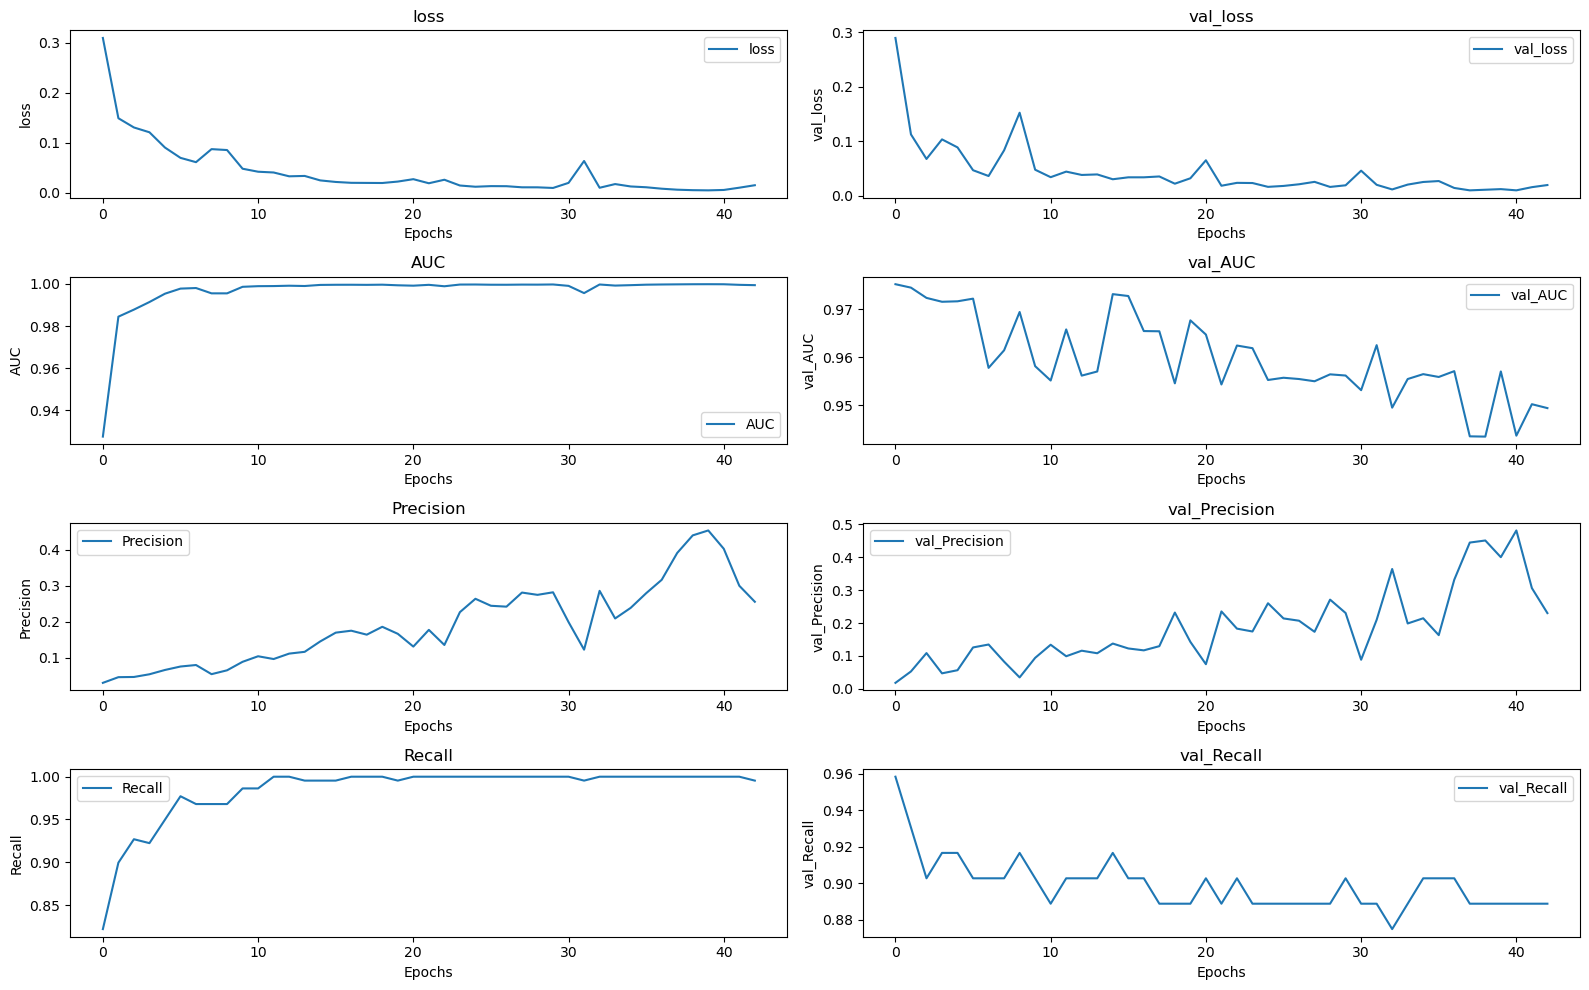

In [93]:
history_dict = training_2.history

# Plot metrics
plt.figure(figsize=(16, 10))

# Subplot for each metric
metrics = ['loss', 'val_loss', 'AUC', 'val_AUC', 'Precision', 'val_Precision', 'Recall', 'val_Recall']
for i, metric in enumerate(metrics):
    plt.subplot(4, 2, i+1)
    plt.plot(history_dict[metric], label=metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title(metric)
    plt.legend()

plt.tight_layout()
plt.show()

In [94]:
y_pred_prob = model_2.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.39      0.82      0.53        90

    accuracy                           1.00     56746
   macro avg       0.70      0.91      0.77     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9338183265869654


**After using different number of nerons, batch sizes, Loss functions, monitor values Model 2 performed slightly better than model 1, precision and recall has improved**
#### Metrics
* Precision(class 1): 0.39 
* Recall(class 1): 0.82 (fruad cases correctly identified)
* f1_score: 0.53
* ROC-AUC: 0.934

#### Confusion Matrix summary for test data
| Actual \ Predicted | Not Fraud (0) | Fraud (1)  | Total (Actual) |
|--------------------|---------------|------------|----------------|
| Not Fraud (0)      | 56,540 (TN)   | 116 (FP)   | 56,656         |
| Fraud (1)          | 16 (FN)       | 74 (TP)    | 90             |
| Total (Predicted)  | 56,556        | 190        | 56,746         |

#### Interpretation in plain English
* Out of 90 actual fraud transactions, model_2 correctly caught 74 (82%) but missed 16.

* Out of all 190 transactions flagged as fraud, only 74 (39%) were truly fraud — the rest (116) were false alarms.



## Optimization techniques I have used for the model to fit.
* Detecting the outliers in the Amount data and used Robust scaler method neutralise the outliers.
* RobustScaler is best for outliers since it used median and IQR to scale the data, Better usecase than StandardScaler and MinMaxscaler. Especially for outliers
* To solve the very heavy Imbalance data problem, I have used class_weight method. Oversampling makes the dataset larger since just 0.04 percent is fraud and it might give wrong results. Undersampling  - No question the dataset decreases to a size where we don't get enough data to train.
* Experimenting with the batch size, i have started randomly but when i decrease the size the model performed better. Hence I keep on decreasing - took even small values but model did not performed well but 500 had good results overall. Finalized batchsize = 500
* Thought of trying other classification loss function but this was the best which is binary_crossentropy.

## Here in the above all classification metrics model 2 has given the best score
## Model_2 Performance Summary
* **Precision(Fraud Class): 0.39** - low but that's trade off as the dataset is heavily imbalanced (few legit transactions flagged as fraud)
* **Recall (Fraud Class): 0.82** - High, model detects most(82%) fraud cases.
* **Accuracy: 1**: - Overall accuracy is high but can be mislead that's why we look at Precision and recall
* **ROC_AUC: 0.934** - Excellent overall descrimination ability.
### Interpretation
* The model prioritizes catching the frauds **(high recall)** but at the cost the few false alarms predict non fruad as fraud (116 of 56540) . 


## Save the Model_2 and model_1 for the future use...

In [96]:
model.save('fraud_detection_model_1.keras')
model_2.save("fraud_detection_model_2.keras")

## Load the Model for the testing purpuses

In [24]:
from tensorflow.keras.models import load_model
loaded_model_1 = load_model("fraud_model_saved.keras")

In [56]:
y_pred_prob = loaded_model_1.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.53      0.79      0.64        90

    accuracy                           1.00     56746
   macro avg       0.77      0.89      0.82     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9314824947441086


In [58]:
y_pred_prob = loaded_model_1.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56653
           1       0.56      0.88      0.68        92

    accuracy                           1.00     56745
   macro avg       0.78      0.94      0.84     56745
weighted avg       1.00      1.00      1.00     56745

ROC-AUC: 0.9689223641405076


In [28]:
loaded_model_2 = load_model("fraud_model_3_saved.keras")

y_pred_prob = loaded_model_2.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.84      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.91      0.55     56746
weighted avg       1.00      0.98      0.99     56746

ROC-AUC: 0.9461024035896953
